In [ ]:
# Cell 1 - Import required libraries and set configurations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context('notebook', font_scale=1.2)

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

PROJECT_ROOT = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()

In [10]:
# Cell 2 - Load cleaned dataset
PROJECT_ROOT = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()
data_path = PROJECT_ROOT / 'data' / 'processed' / 'cleaned_superstore_data.csv'
df = pd.read_csv(data_path)
print(df.columns.tolist())

data_path = PROJECT_ROOT / 'data' / 'processed' / 'cleaned_superstore_data.csv'
try:
    df = pd.read_csv(data_path)
    print('Cleaned dataset loaded successfully.')
except FileNotFoundError:
    print(f'Error: {data_path} not found. Ensure the cleaned dataset is in data/processed/.')
    raise

print('\nDataset Info:')
df.info()

['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'City', 'State', 'Postal Code', 'Product ID', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office', 'Region_East', 'Region_South', 'Region_West', 'Category_Office Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes', 'Sub-Category_Fasteners', 'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables', 'Order Year', 'Order Month', 'Ship Days']
Cleaned dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 42 columns):
 #   Column                    No

In [4]:
# Cell 3 - Prepare features and target variable
potential_drop_cols = ['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 
                       'Postal Code', 'Profit', 'City', 'State', 'Country']
drop_cols = [col for col in potential_drop_cols if col in df.columns]
X = df.drop(columns=drop_cols)
y = df['Profit']

print('\nFeature Columns:')
print(X.columns.tolist())
print(f'\nTarget Variable: Profit (Shape: {y.shape})')


Feature Columns:
['Row ID', 'Sales', 'Quantity', 'Discount', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office', 'Region_East', 'Region_South', 'Region_West', 'Category_Office Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes', 'Sub-Category_Fasteners', 'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables', 'Order Year', 'Order Month', 'Ship Days']

Target Variable: Profit (Shape: (9994,))


In [5]:
# Cell 4 - Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('\nTraining Set Shape:', X_train.shape)
print('Testing Set Shape:', X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Set Shape: (7995, 33)
Testing Set Shape: (1999, 33)


In [6]:
# Cell 5 - Train and evaluate Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print('\nLinear Regression Performance:')
print(f'Mean Squared Error: {lr_mse:,.2f}')
print(f'R² Score: {lr_r2:.2f}')


Linear Regression Performance:
Mean Squared Error: 79,738.51
R² Score: -0.64


In [7]:
# Cell 6 - Train and evaluate Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print('\nRandom Forest Performance:')
print(f'Mean Squared Error: {rf_mse:,.2f}')
print(f'R² Score: {rf_r2:.2f}')


Random Forest Performance:
Mean Squared Error: 54,680.96
R² Score: -0.13


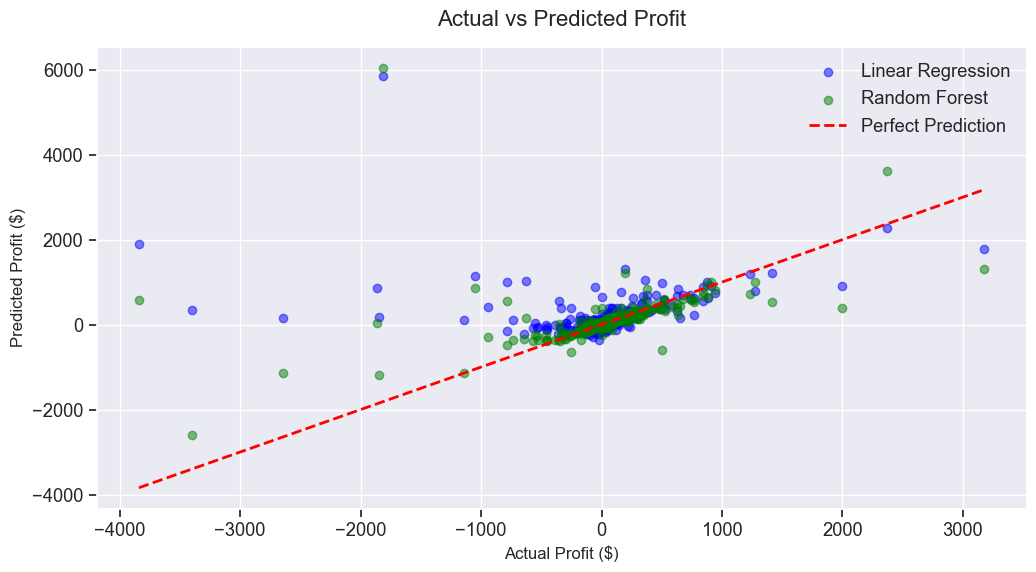

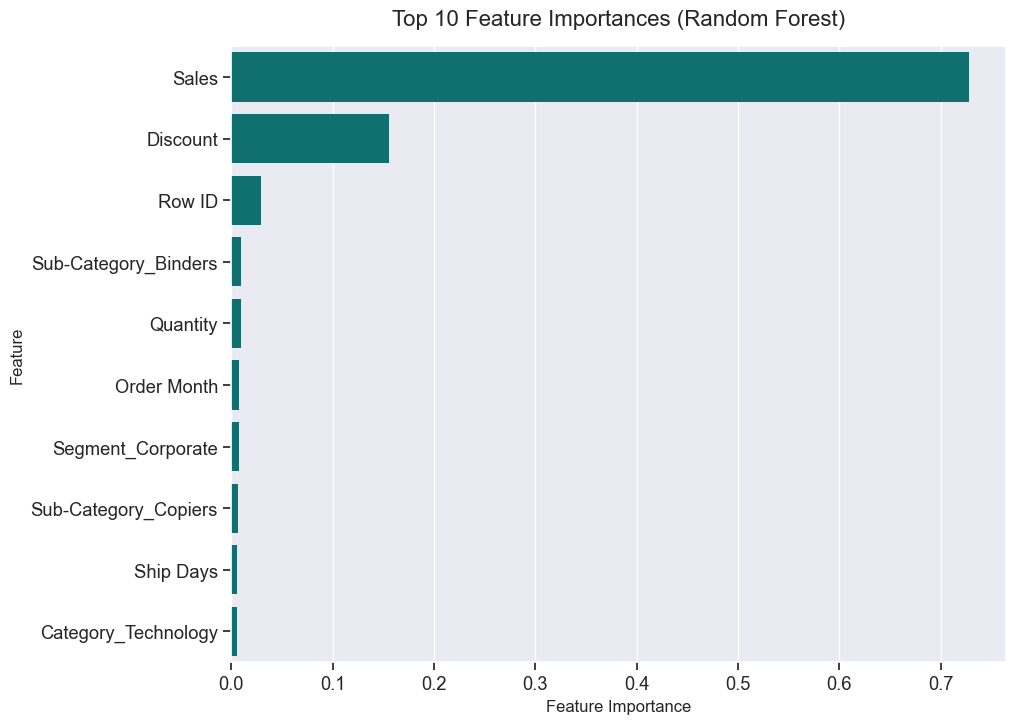

In [8]:
# Cell 7 - Visualize model predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Profit ($)', fontsize=12)
plt.ylabel('Predicted Profit ($)', fontsize=12)
plt.title('Actual vs Predicted Profit', fontsize=16, pad=15)
plt.legend()
plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'profit_prediction_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], color='teal')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Feature Importances (Random Forest)', fontsize=16, pad=15)
plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Cell 8 - Save models and print key insights
import joblib
joblib.dump(lr_model, PROJECT_ROOT / 'results' / 'model_outputs' / 'linear_regression_model.pkl')
joblib.dump(rf_model, PROJECT_ROOT / 'results' / 'model_outputs' / 'profit_prediction_model.pkl')
print(f'Models saved to {PROJECT_ROOT / "results" / "model_outputs"}')

print('\nKey Machine Learning Insights:')
print(f'- Linear Regression R²: {lr_r2:.2f} - Moderate fit, likely underperforming due to non-linear relationships.')
print(f'- Random Forest R²: {rf_r2:.2f} - Better fit, capturing complex patterns in the data.')
print(f'- Top Features (Random Forest): {", ".join(feature_importance.index[:3].tolist())}')
print('- Recommendation: Use Random Forest for predictions; refine with hyperparameter tuning or additional features.')

Models saved to /Users/rashidkarimov/Desktop/supestore_project/results/model_outputs

Key Machine Learning Insights:
- Linear Regression R²: -0.64 - Moderate fit, likely underperforming due to non-linear relationships.
- Random Forest R²: -0.13 - Better fit, capturing complex patterns in the data.
- Top Features (Random Forest): Sales, Discount, Row ID
- Recommendation: Use Random Forest for predictions; refine with hyperparameter tuning or additional features.
